# Hurricane Prediction

## Intro

The idea is to predict hurricane entry based on a set of weather conditions that are measured in the USA.

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.noise import GaussianNoise, GaussianDropout
from datetime import datetime, timedelta
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
def render_plots_numbers(data):
    values = data.values
    cols_to_plot = [col for col in range(1, len(data.columns)) if type(values[0, col]) != str]
    pyplot.figure(figsize=(10, len(cols_to_plot) * 1.2))
    i = 1
    for group in cols_to_plot:
        pyplot.subplot(len(cols_to_plot), 1, i)
        pyplot.plot(values[:, group])
        pyplot.title(data.columns[group], y=1, loc='right')
        i += 1
    pyplot.tight_layout(h_pad=1)
    pyplot.show()

In [3]:
houston_weather = read_csv('HurricaneData/Preprocessed/houston.csv', index_col=0)
hurdat_houston = read_csv('HurricaneData/Preprocessed/hurdat_houston.csv', index_col=0)

houston_weather.index = pd.to_datetime(houston_weather.index)
hurdat_houston.index = pd.to_datetime(hurdat_houston.index)

In [4]:
hurdat_houston

,Name,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Date,,,,,,,,,,,,,,,,,,,
1853-09-09 00:00:00,UNNAMED,,HU,390.0,623.0,100,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-09-11 18:00:00,UNNAMED,,HU,395.0,618.0,90,0,0,0,0,0,0,0,0,0,0,0,0,0
1856-09-03 00:00:00,UNNAMED,,TS,382.0,618.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0
1858-09-22 00:00:00,UNNAMED,,HU,390.0,636.0,80,0,0,0,0,0,0,0,0,0,0,0,0,0
1859-07-01 12:00:00,UNNAMED,,HU,215.0,975.0,90,0,0,0,0,0,0,0,0,0,0,0,0,0
1862-08-20 06:00:00,UNNAMED,,HU,397.0,625.0,90,0,0,0,0,0,0,0,0,0,0,0,0,0
1863-09-09 12:00:00,UNNAMED,,HU,202.0,620.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0
1863-09-09 18:00:00,UNNAMED,,HU,214.0,626.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0
1866-08-18 00:00:00,UNNAMED,,TS,205.0,985.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0


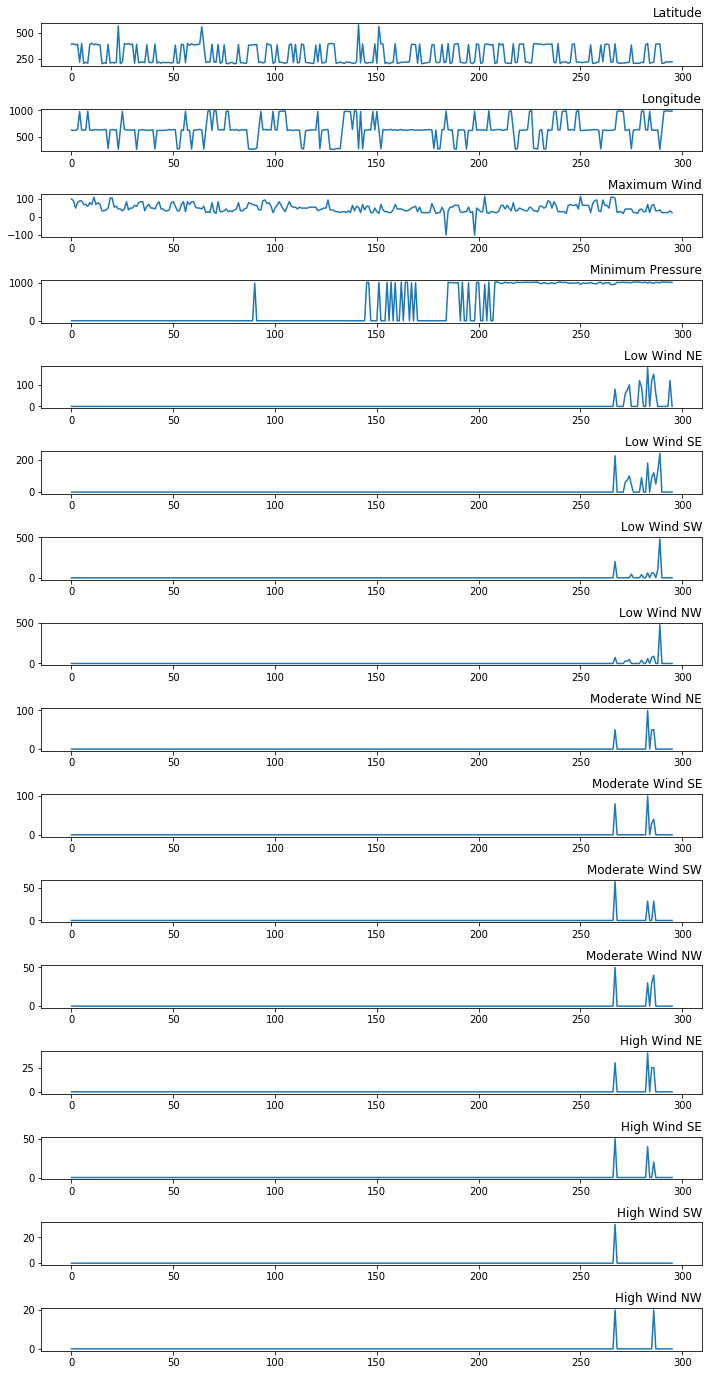

In [5]:
render_plots_numbers(hurdat_houston)

In [6]:
houston_weather

,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,Min.Humidity,Max.Sea.Level.PressureIn,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
Date,,,,,,,,,,,,,,,,,,,,,
1948-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0,-1,Houston (TX),Summer
1948-07-01,90.0,80.0,69.0,74.0,70.0,67.0,100.0,76.0,52.0,30.11,...,3.0,23.0,7.0,0.0,0.00,0.0,Fog,44,Houston (TX),Summer
1948-07-02,87.0,80.0,73.0,76.0,74.0,71.0,97.0,84.0,67.0,30.12,...,3.0,14.0,6.0,0.0,0.00,0.0,Fog-Rain-Thunderstorm,84,Houston (TX),Summer
1948-07-03,84.0,80.0,75.0,79.0,75.0,70.0,100.0,86.0,67.0,30.08,...,3.0,10.0,5.0,0.0,0.00,0.0,Fog-Rain,69,Houston (TX),Summer
1948-07-04,88.0,80.0,73.0,77.0,75.0,73.0,97.0,83.0,61.0,30.05,...,0.0,12.0,6.0,0.0,0.00,0.0,Fog-Rain-Thunderstorm,84,Houston (TX),Summer
1948-07-05,88.0,82.0,75.0,76.0,74.0,72.0,94.0,82.0,59.0,30.08,...,7.0,14.0,5.0,0.0,0.00,0.0,Rain-Thunderstorm,100,Houston (TX),Summer
1948-07-06,95.0,84.0,73.0,75.0,72.0,70.0,97.0,74.0,48.0,30.05,...,1.0,12.0,5.0,0.0,0.00,0.0,Fog,55,Houston (TX),Summer
1948-07-07,96.0,84.0,73.0,75.0,72.0,71.0,93.0,71.0,46.0,29.97,...,3.0,5.0,3.0,0.0,0.00,0.0,Fog,11,Houston (TX),Summer
1948-07-08,91.0,82.0,73.0,75.0,73.0,68.0,97.0,84.0,55.0,29.98,...,3.0,13.0,5.0,0.0,0.00,0.0,Fog-Rain-Thunderstorm,290,Houston (TX),Summer


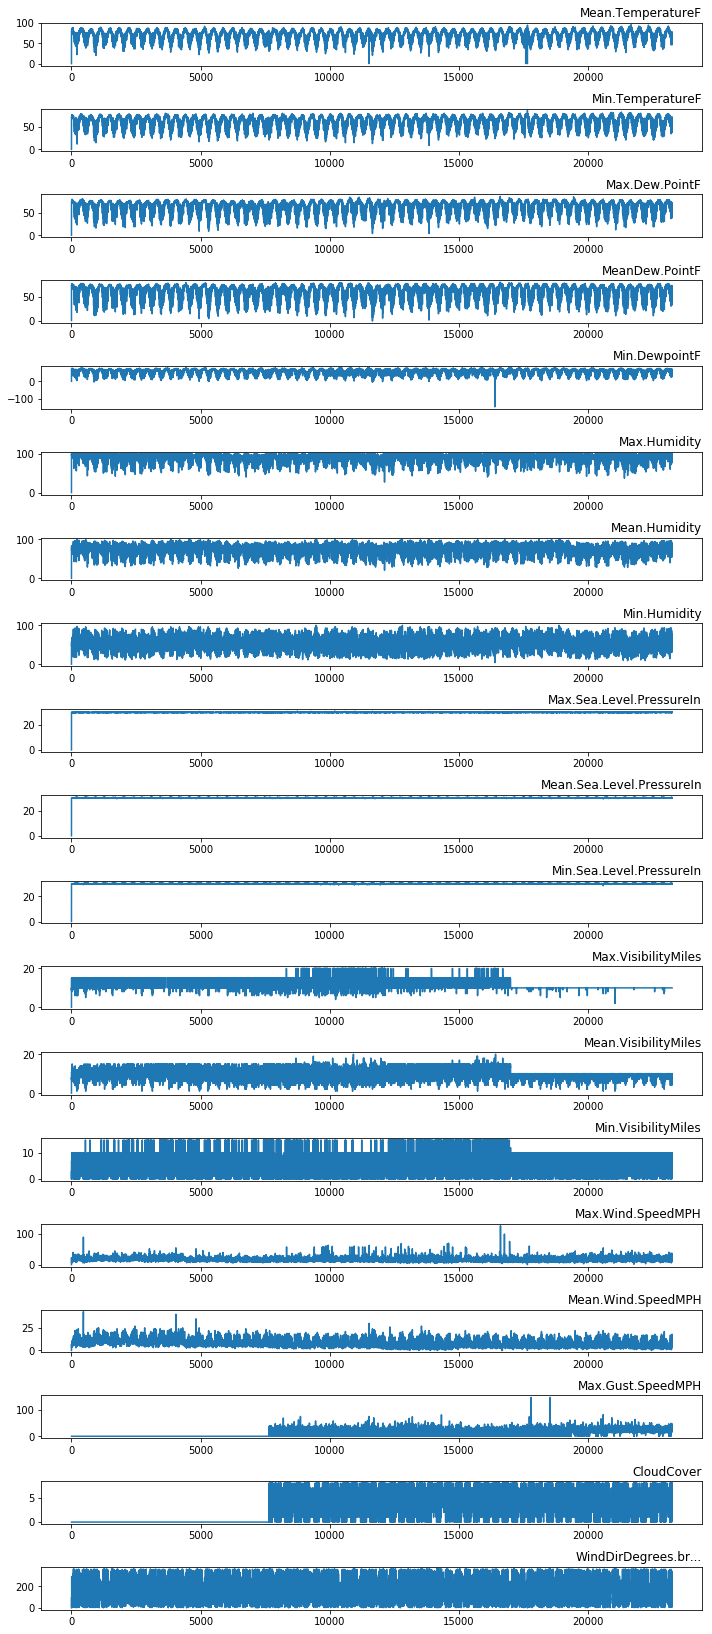

In [7]:
render_plots_numbers(houston_weather)

In [8]:
houston_to_supervise = houston_weather.loc[:, ['season', 'Events', 'Max.TemperatureF', 'Max.Dew.PointF', 'Max.Humidity', 'Max.Wind.SpeedMPH', 'Max.Sea.Level.PressureIn']]
houston_to_supervise

,season,Events,Max.TemperatureF,Max.Dew.PointF,Max.Humidity,Max.Wind.SpeedMPH,Max.Sea.Level.PressureIn
Date,,,,,,,
1948-06-30,Summer,0,0.0,0.0,0.0,0.0,0.00
1948-07-01,Summer,Fog,90.0,74.0,100.0,23.0,30.11
1948-07-02,Summer,Fog-Rain-Thunderstorm,87.0,76.0,97.0,14.0,30.12
1948-07-03,Summer,Fog-Rain,84.0,79.0,100.0,10.0,30.08
1948-07-04,Summer,Fog-Rain-Thunderstorm,88.0,77.0,97.0,12.0,30.05
1948-07-05,Summer,Rain-Thunderstorm,88.0,76.0,94.0,14.0,30.08
1948-07-06,Summer,Fog,95.0,75.0,97.0,12.0,30.05
1948-07-07,Summer,Fog,96.0,75.0,93.0,5.0,29.97
1948-07-08,Summer,Fog-Rain-Thunderstorm,91.0,75.0,97.0,13.0,29.98


In [36]:
if 'Hurricane_Started' in houston_to_supervise:
    del houston_to_supervise['Hurricane_Started']
houston_to_supervise.insert(len(houston_to_supervise.columns), 'Hurricane_Started', 0)
hurricane_started = np.zeros(len(houston_to_supervise.index))
date_range = timedelta(days=2)
for i, row in enumerate(houston_to_supervise.itertuples()):
    start_date = row[0] - date_range
    end_date = row[0] + date_range
    mask = (hurdat_houston.index > start_date) & (hurdat_houston.index <= end_date)
    found_hurricane = len(hurdat_houston[mask].index) > 0
    if found_hurricane:
        hurricane_started[i] = 1
hurricane_started.shape, houston_to_supervise.shape

((23252,), (23252, 8))

In [37]:
values = houston_to_supervise.values

encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])

encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1])

values

array([[2, 0, 0.0, ..., 0.0, 0.0, 0],
       [2, 1, 90.0, ..., 23.0, 30.11, 0],
       [2, 6, 87.0, ..., 14.0, 30.12, 0],
       ..., 
       [3, 0, 52.0, ..., 13.0, 30.15, 0],
       [3, 11, 57.0, ..., 16.0, 30.23, 0],
       [3, 11, 55.0, ..., 17.0, 30.34, 0]], dtype=object)

In [65]:
# convert series to supervised learning
def series_to_supervised(data, dataset_cols, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('%s(t-%d)' % (dataset_cols[j], i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('%s(t)' % (dataset_cols[j])) for j in range(n_vars)]
		else:
			names += [('%s(t+%d)' % (dataset_cols[j], i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [71]:
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, houston_to_supervise.columns, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.loc[:, 'season(t)' : 'Max.Humidity(t)'].head(0).columns, axis=1, inplace=True)
reframed.drop(reframed.loc[:, ['Max.Sea.Level.PressureIn(t)']].head(0).columns, axis=1, inplace=True)

print(reframed.head(), reframed.shape, values.shape)

   season(t-1)  Events(t-1)  Max.TemperatureF(t-1)  Max.Dew.PointF(t-1)  \
1     0.666667     0.000000               0.000000             0.000000   
2     0.666667     0.052632               0.825688             0.850575   
3     0.666667     0.315789               0.798165             0.873563   
4     0.666667     0.105263               0.770642             0.908046   
5     0.666667     0.315789               0.807339             0.885057   

   Max.Humidity(t-1)  Max.Wind.SpeedMPH(t-1)  Max.Sea.Level.PressureIn(t-1)  \
1               0.00                0.000000                       0.000000   
2               1.00                0.181102                       0.967545   
3               0.97                0.110236                       0.967866   
4               1.00                0.078740                       0.966581   
5               0.97                0.094488                       0.965617   

   Hurricane_Started(t-1)  Max.Wind.SpeedMPH(t)  Hurricane_Started(t)  
1 

In [93]:
# split into train and test sets
values = reframed.values
train_percent = 0.5
train_amount = math.floor(len(reframed.values) * train_percent)
train = values[:train_amount, :]
test = values[train_amount:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -2:]
test_X, test_y = test[:, :-1], test[:, -2:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(11625, 1, 9) (11625, 2) (11626, 1, 9) (11626, 2)


In [96]:
# design network
model = Sequential()
model.add(GaussianNoise(0.5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(1, return_sequences=False))
model.add(GaussianDropout(rate=0.5))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

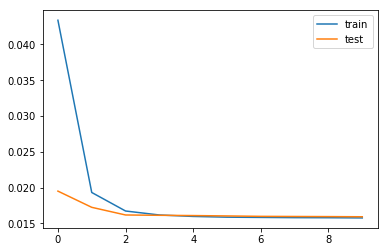

Train on 11625 samples, validate on 11626 samples
Epoch 1/10
2s - loss: 0.0158 - val_loss: 0.0159
Epoch 2/10
1s - loss: 0.0158 - val_loss: 0.0159
Epoch 3/10
2s - loss: 0.0158 - val_loss: 0.0159
Epoch 4/10


KeyboardInterrupt: 

In [97]:
while True:
    # fit network
    history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    
    # Clear the screen so we can see the charts
    clear_output()
    
    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()